# Project description

You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.
You need to prioritize these hypotheses, launch an A/B test, and analyze the results.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns



In [2]:
try:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')  
except:
    hypotheses = pd.read_csv('hypotheses_us.csv',  sep=';')

In [3]:
try:
    orders = pd.read_csv('/datasets/orders_us.csv')
except:
    orders = pd.read_csv('orders_us.csv')

In [4]:
try:
    visits = pd.read_csv('/datasets/visits_us.csv')
except:
    visits = pd.read_csv('visits_us.csv')

In [5]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [6]:
hypotheses.columns = hypotheses.columns.str.lower()

### Part - Prioritizing Hypotheses
The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.

The task is to:

- Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
- Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
- Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

In [7]:
def ice(hypotheses,impact,confidence,effort):
    ice_score = (hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']
    return ice_score.astype('int').sort_values(ascending=False)

In [8]:
hypotheses['ice'] = ice(hypotheses, 'impact', 'confidence', 'effort')
ice(hypotheses, 'impact', 'confidence', 'effort')

8    16
0    13
7    11
6     8
2     7
1     2
3     1
4     1
5     1
dtype: int64

In [9]:
def rice(hypotheses,reach,impact,confidence,effort):
    rice_score = (hypotheses['reach']*hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']
    return rice_score.astype('int').sort_values(ascending=False)

In [10]:
hypotheses['rice'] = rice(hypotheses,'reach','impact','confidence','effort')
rice(hypotheses,'reach','impact','confidence','effort')

7    112
2     56
0     40
6     40
8     16
3      9
1      4
5      4
4      3
dtype: int64

In [11]:
hypotheses['overall_score'] = ((hypotheses['ice']+hypotheses['rice'])/2).astype('int')
hypotheses = hypotheses.sort_values(by='overall_score', ascending=False)
hypotheses

,hypothesis,reach,impact,confidence,effort,ice,rice,overall_score
7,Add a subscription form to all the main pages....,10,7,8,5,11,112,61
2,Add product recommendation blocks to the store...,8,3,7,3,7,56,31
0,Add two new channels for attracting traffic. T...,3,10,8,6,13,40,26
6,Show banners with current offers and sales on ...,5,3,8,3,8,40,24
8,Launch a promotion that gives users discounts ...,1,9,9,5,16,16,16
3,Change the category structure. This will incre...,8,3,3,8,1,9,5
1,Launch your own delivery service. This will sh...,2,5,4,10,2,4,3
4,Change the background color on the main page. ...,3,1,1,1,1,3,2
5,Add a customer review page. This will increase...,3,2,2,3,1,4,2


Text(0.5, 1.0, 'Hypotheses Rankings')

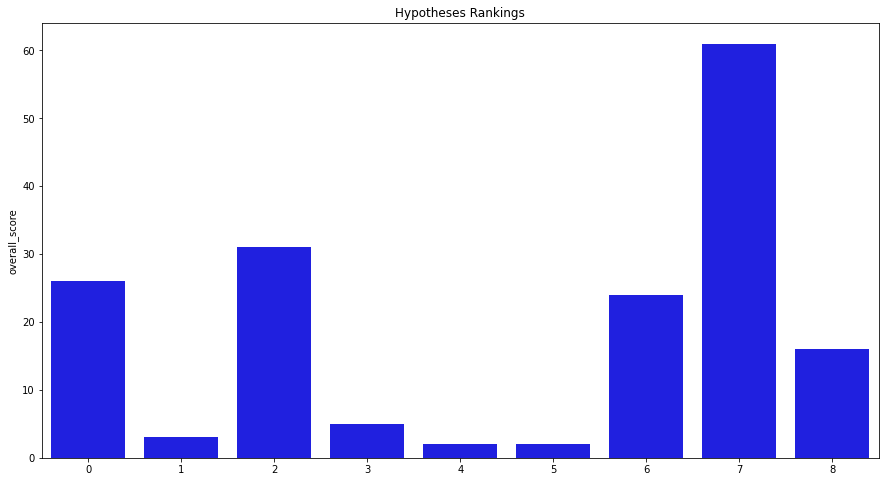

In [12]:
fig,graph= plt.subplots(figsize=(15,8))
sns.barplot(data=hypotheses, x=hypotheses.index, y='overall_score', color='blue')
graph.set_title("Hypotheses Rankings")


- Considering both measurements, I would chose to test hypothesis 7

### Part - A/B Test Analysis

You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.

**Analyze the A/B test:**

1.  Graph cumulative revenue by group. Make conclusions and conjectures.
2. Graph cumulative average order size by group. Make conclusions and conjectures.
3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.
4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.
5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.
6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.
7. Plot a scatter chart of order prices. Make conclusions and conjectures.
8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.
9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.
10. Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.
11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.
12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.
13. Make a decision based on the test results. The possible decisions are: 

 - Stop the test, consider one of the groups the leader. 
 - Stop the test, conclude that there is no difference between the groups. 
 - Continue the test.


In [13]:
orders.columns = orders.columns.str.lower()
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [14]:
orders.head(10)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


In [15]:
ab_visitors = orders.groupby('visitorid')['group'].nunique().reset_index()
ab_visitors = (ab_visitors[ab_visitors['group'] >1]['visitorid'])
len(ab_visitors)

58

There are 58 users who went to both group A and group B. To ensure reliability of the test, I will drop these rows.

In [16]:
orders = orders[~orders['visitorid'].isin(ab_visitors)]
len(orders)

1016

In [17]:
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [18]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [19]:
# building an array with unique paired date-group values
dates_groups = orders[['date','group']].drop_duplicates()
dates_groups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [20]:
ordersAggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated.columns = ['date', 'group', 'orders', 'buyers', ' cum_revenue']
ordersAggregated[ordersAggregated['group']=='A'].head(15)


,date,group,orders,buyers,cum_revenue
55,2019-08-01,A,23,19,2266.6
175,2019-08-02,A,42,36,3734.9
291,2019-08-03,A,66,60,5550.1
499,2019-08-04,A,77,71,6225.6
719,2019-08-05,A,99,92,7623.6
362,2019-08-06,A,114,104,8292.0
580,2019-08-07,A,130,120,10234.0
835,2019-08-08,A,144,133,11638.8
569,2019-08-09,A,155,143,13734.0
859,2019-08-10,A,170,158,16121.5


In [21]:
# getting aggregated cumulative daily data on orders 
orders_aggregated_a = orders[orders['group']=="A"]
orders_aggregated_a = orders_aggregated_a.groupby('date').agg({'transactionid': pd.Series.nunique, 'group' : 'max', 'visitorid' : pd.Series.nunique, 'revenue' : 'sum' }).reset_index()
orders_aggregated_a['revenue_a_cum'] = orders_aggregated_a['revenue'].cumsum()
orders_aggregated_a['orders_a_cum'] = orders_aggregated_a['transactionid'].cumsum()


orders_aggregated_a.head()

,date,transactionid,group,visitorid,revenue,revenue_a_cum,orders_a_cum
0,2019-08-01,23,A,19,2266.6,2266.6,23
1,2019-08-02,19,A,18,1468.3,3734.9,42
2,2019-08-03,24,A,24,1815.2,5550.1,66
3,2019-08-04,11,A,11,675.5,6225.6,77
4,2019-08-05,22,A,22,1398.0,7623.6,99


In [22]:
orders_aggregated_b = orders[orders['group']=="B"]
orders_aggregated_b = orders_aggregated_b.groupby('date').agg({'transactionid': 'nunique',  'group' : 'first', 'visitorid' : 'nunique', 'revenue' : 'sum' }).reset_index()
orders_aggregated_b['revenue_b_cum'] = orders_aggregated_b['revenue'].cumsum()
orders_aggregated_b['orders_b_cum'] = orders_aggregated_b['transactionid'].cumsum()


orders_aggregated_b.head()

,date,transactionid,group,visitorid,revenue,revenue_b_cum,orders_b_cum
0,2019-08-01,17,B,17,967.2,967.2,17
1,2019-08-02,23,B,22,2568.1,3535.3,40
2,2019-08-03,14,B,14,1071.6,4606.9,54
3,2019-08-04,14,B,13,1531.6,6138.5,68
4,2019-08-05,21,B,21,1449.3,7587.8,89


In [23]:
cumulative_revenue_by_group = orders_aggregated_a[['date', 'revenue_a_cum', 'orders_a_cum']].merge(orders_aggregated_b[['date', 'revenue_b_cum', 'orders_b_cum']],on='date')
cumulative_revenue_by_group.head()


,date,revenue_a_cum,orders_a_cum,revenue_b_cum,orders_b_cum
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


#### Graph cumulative revenue by group. Make conclusions and conjectures.

<AxesSubplot:title={'center':'Cumulative Revenue'}, xlabel='date'>

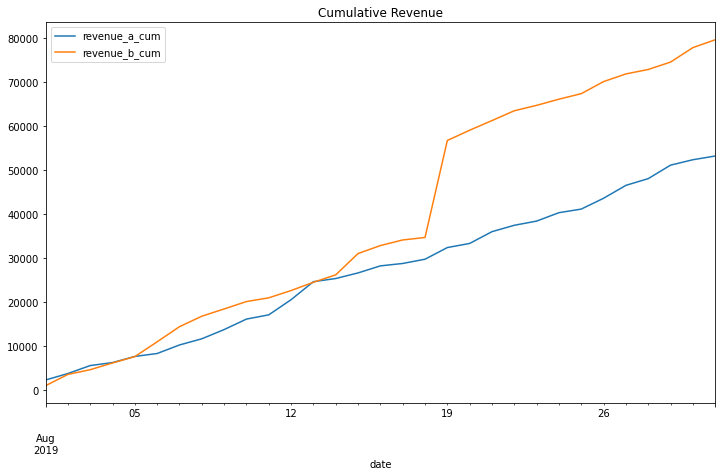

In [24]:
cumulative_revenue_by_group.plot(x='date', y=['revenue_a_cum','revenue_b_cum'], figsize=(12,7), title='Cumulative Revenue')


Both groups started more or less with the same revenue, but after around August 15th, we see a clear growth of cumulative revenue of Group B over Group A. So far, Group B seems to be better with regards to revenue

#### Graph cumulative average order size by group. Make conclusions and conjectures.

In [25]:
cumulative_revenue_by_group.head()

,date,revenue_a_cum,orders_a_cum,revenue_b_cum,orders_b_cum
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


Text(0.5, 1.0, 'Cumulative average order size by group')

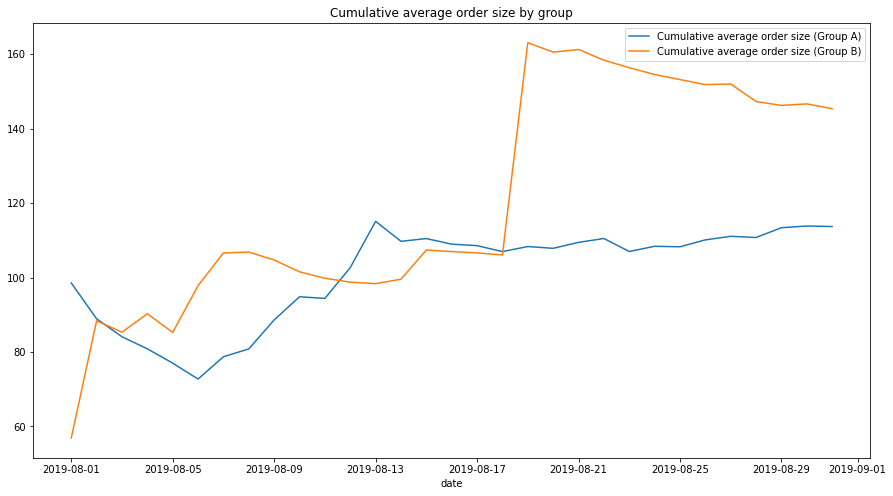

In [26]:
fig,graph= plt.subplots(figsize=(15,8))
sns.lineplot(data=cumulative_revenue_by_group, x='date', y=(cumulative_revenue_by_group['revenue_a_cum']/cumulative_revenue_by_group['orders_a_cum']), label='Cumulative average order size (Group A)')
sns.lineplot(data=cumulative_revenue_by_group, x='date', y=(cumulative_revenue_by_group['revenue_b_cum']/cumulative_revenue_by_group['orders_b_cum']), label='Cumulative average order size (Group B)')
graph.set_title("Cumulative average order size by group")



Seems that group B is performing better than Group A, from the test and throughout the test's duration

#### Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

Text(0.5, 1.0, 'Relative difference in cumulative average order size')

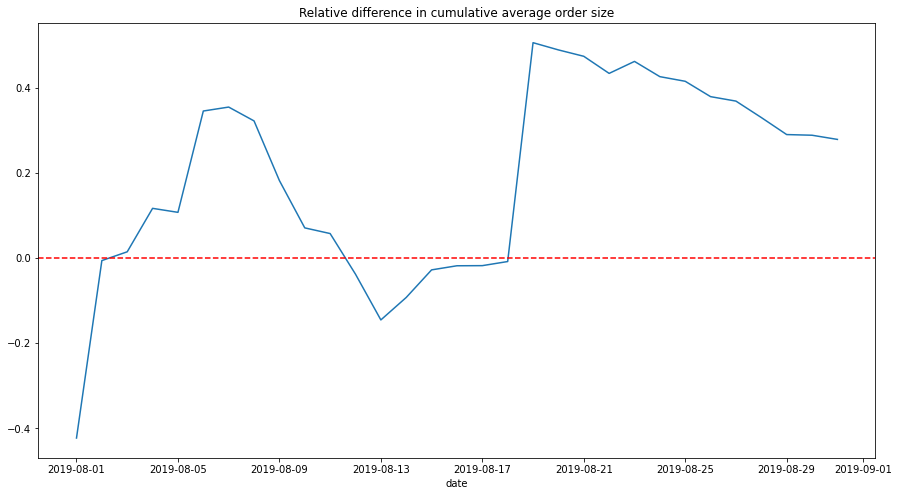

In [27]:
fig,graph= plt.subplots(figsize=(15,8))
sns.lineplot(data=cumulative_revenue_by_group, x='date', y=(cumulative_revenue_by_group.revenue_b_cum/cumulative_revenue_by_group.orders_b_cum)/(cumulative_revenue_by_group.revenue_a_cum/cumulative_revenue_by_group.orders_a_cum)-1)
graph.axhline(0, linestyle="dashed", color='r')
graph.set_title("Relative difference in cumulative average order size")

Group B's results on order size have a clear peak after August 18th and seem to be improving day by day. So far, it seems this group's performance is better. We'll need to see what happens after we remove outliers.

In [28]:
visits_a = visits[visits['group']=='A'][['date', 'visits']]
visits_a.columns = ['date', 'visits_a']

visits_b = visits[visits['group']=='B'][['date', 'visits']]
visits_b.columns = ['date', 'visits_b']

In [29]:
cumulative_revenue_by_group = cumulative_revenue_by_group.merge(visits_a, on='date')
cumulative_revenue_by_group = cumulative_revenue_by_group.merge(visits_b, on='date')
cumulative_revenue_by_group.head()

,date,revenue_a_cum,orders_a_cum,revenue_b_cum,orders_b_cum,visits_a,visits_b
0,2019-08-01,2266.6,23,967.2,17,719,713
1,2019-08-02,3734.9,42,3535.3,40,619,581
2,2019-08-03,5550.1,66,4606.9,54,507,509
3,2019-08-04,6225.6,77,6138.5,68,717,770
4,2019-08-05,7623.6,99,7587.8,89,756,707


#### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

In [30]:
conversion_a = orders_aggregated_a[['date', 'transactionid']]
conversion_a.columns = ['date', 'orders_a']

conversion_b = orders_aggregated_b[['date', 'transactionid']]
conversion_b.columns = ['date', 'orders_b']

conversion = conversion_a.merge(conversion_b, on='date')

visits_a = visits[visits['group']=='A']
visits_a = visits_a.drop('group', axis=1)
visits_a.columns = ['date', 'visits_a']

visits_b = visits[visits['group']=='B']
visits_b = visits_b.drop('group', axis=1)
visits_b.columns = ['date', 'visits_b']

conversion = conversion.merge(visits_a, on='date')
conversion = conversion.merge(visits_b, on='date')

conversion['conversion_a'] = conversion['orders_a']/conversion['visits_a']
conversion['conversion_b'] = conversion['orders_b']/conversion['visits_b']
conversion.head()

,date,orders_a,orders_b,visits_a,visits_b,conversion_a,conversion_b
0,2019-08-01,23,17,719,713,0.031989,0.023843
1,2019-08-02,19,23,619,581,0.030695,0.039587
2,2019-08-03,24,14,507,509,0.047337,0.027505
3,2019-08-04,11,14,717,770,0.015342,0.018182
4,2019-08-05,22,21,756,707,0.029101,0.029703


Text(0.5, 1.0, 'Conversion rates')

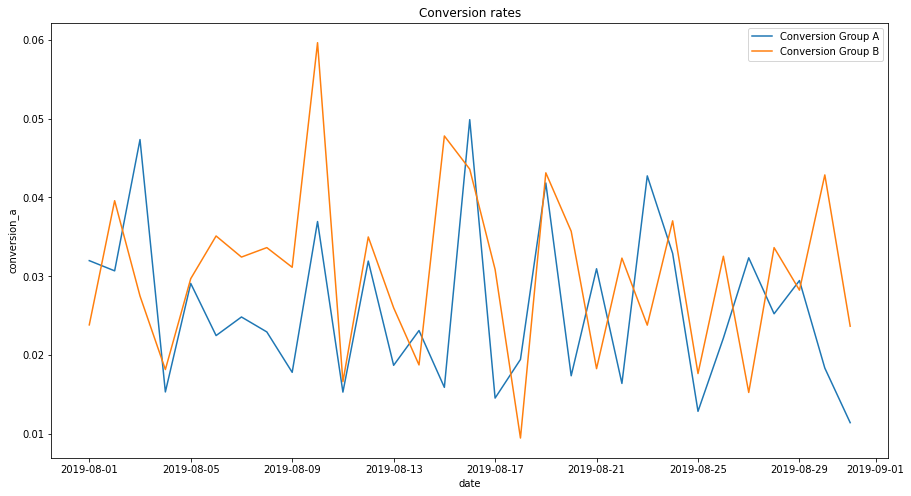

In [31]:
fig,graph= plt.subplots(figsize=(15,8))
sns.lineplot(data=conversion, x='date', y=conversion.conversion_a, label='Conversion Group A')
sns.lineplot(data=conversion, x='date', y=conversion.conversion_b, label='Conversion Group B')
graph.set_title("Conversion rates")

In [32]:
cumulative_conversion = pd.DataFrame()
cumulative_conversion['date'] = cumulative_revenue_by_group['date']
cumulative_conversion['conversion_a'] = cumulative_revenue_by_group['orders_a_cum']/cumulative_revenue_by_group['visits_a']
cumulative_conversion['conversion_b'] = cumulative_revenue_by_group['orders_b_cum']/cumulative_revenue_by_group['visits_b']
cumulative_conversion.head()

,date,conversion_a,conversion_b
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.067851,0.068847
2,2019-08-03,0.130178,0.106090
3,2019-08-04,0.107392,0.088312
4,2019-08-05,0.130952,0.125884


Text(0.5, 1.0, 'Cumulative conversion rates')

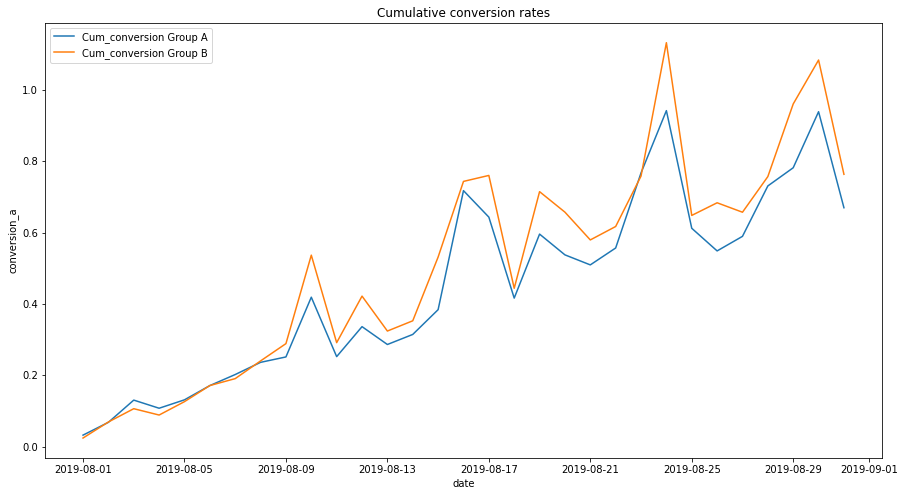

In [33]:
fig,graph= plt.subplots(figsize=(15,8))
sns.lineplot(data=cumulative_conversion, x='date', y=cumulative_conversion.conversion_a, label='Cum_conversion Group A')
sns.lineplot(data=cumulative_conversion, x='date', y=cumulative_conversion.conversion_b, label='Cum_conversion Group B')
graph.set_title("Cumulative conversion rates")

Although very close to each other, Group B's conversion rates (both cumulative and non-cumulative) seem to be higher than Group A's conversion rates


In [34]:
conversion.head()

,date,orders_a,orders_b,visits_a,visits_b,conversion_a,conversion_b
0,2019-08-01,23,17,719,713,0.031989,0.023843
1,2019-08-02,19,23,619,581,0.030695,0.039587
2,2019-08-03,24,14,507,509,0.047337,0.027505
3,2019-08-04,11,14,717,770,0.015342,0.018182
4,2019-08-05,22,21,756,707,0.029101,0.029703


In [35]:
orders_aggregated_ab = orders_aggregated_a[['date', 'revenue_a_cum', 'orders_a_cum']].merge(orders_aggregated_b[['date', 'revenue_b_cum', 'orders_b_cum']], on='date')
orders_aggregated_ab.head()


,date,revenue_a_cum,orders_a_cum,revenue_b_cum,orders_b_cum
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


In [36]:
conversion.head()

,date,orders_a,orders_b,visits_a,visits_b,conversion_a,conversion_b
0,2019-08-01,23,17,719,713,0.031989,0.023843
1,2019-08-02,19,23,619,581,0.030695,0.039587
2,2019-08-03,24,14,507,509,0.047337,0.027505
3,2019-08-04,11,14,717,770,0.015342,0.018182
4,2019-08-05,22,21,756,707,0.029101,0.029703


Text(0.5, 1.0, 'Relative difference for cumulative conversion rates')

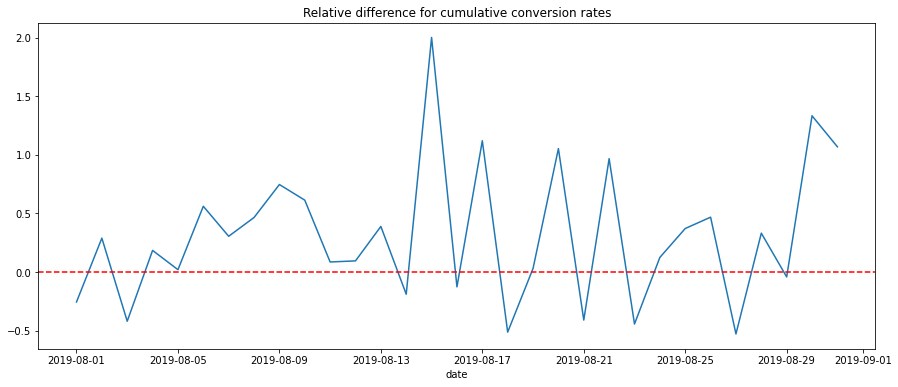

In [37]:
# Relative difference graph for the cumulative conversion rates 

fig,graph= plt.subplots(figsize=(15,6))
graph =  sns.lineplot(data=conversion, x="date", y=(conversion['conversion_b']/conversion['conversion_a'])-1)
graph.axhline(0, linestyle="dashed", color='r')
graph.set_title("Relative difference for cumulative conversion rates")

Text(0.5, 1.0, 'Relative difference for cumulative order size')

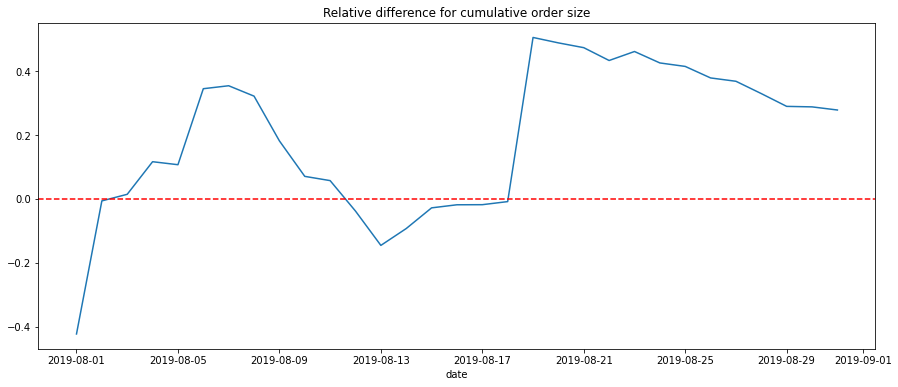

In [38]:
# Relative difference graph for the cumulative order size

fig,graph= plt.subplots(figsize=(15,6))
graph =  sns.lineplot(data=orders_aggregated_ab, x="date", y=((orders_aggregated_ab['revenue_b_cum']/orders_aggregated_ab['orders_b_cum'])/(orders_aggregated_ab['revenue_a_cum']/orders_aggregated_ab['orders_a_cum'])-1))
graph.axhline(0, linestyle="dashed", color='r')
graph.set_title("Relative difference for cumulative order size")


- Both conversion rate and order size of Group B (relative to Group A) point to having a growth rate.
- It's important to note these conclusions are based on raw data, so we will need to evaluate whether there are outliers, remove them, and reach new conclusions ofter the filtered data.

#### Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

In [39]:
orders_by_users = (orders.drop(['date', 'revenue', 'group'], axis=1))
orders_by_users = orders_by_users.groupby('visitorid', as_index=False).agg({'transactionid': pd.Series.nunique})
orders_by_users.columns = ['visitorid', 'orders']
orders_by_users.head()

,visitorid,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


Text(0.5, 1.0, 'Orders per user')

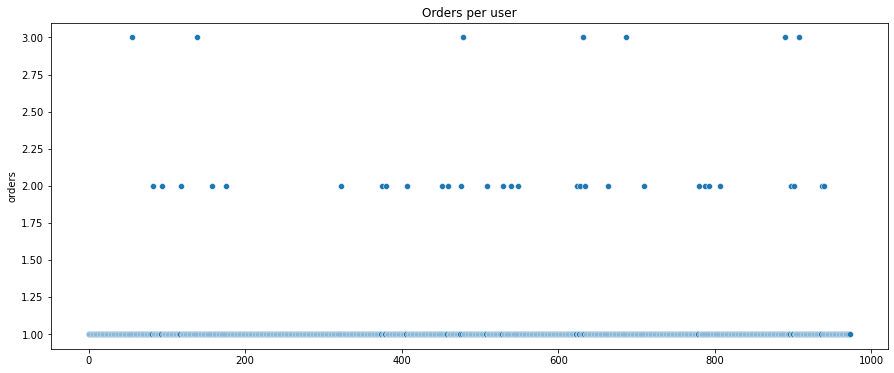

In [40]:
fig,graph= plt.subplots(figsize=(15,6))
graph =  sns.scatterplot(data=orders_by_users, x=range(0,len(orders_by_users)), y='orders')
graph.set_title("Orders per user")

Most users placed 1 order, followed by some that placed 2 orders, and a very few that placed 3 orders

#### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [41]:
print(np.percentile(orders_by_users['orders'], [95,99]))

[1. 2.]


- Not more than 5% of users placed more than 1 order
- Not more than 1% of users placed more than 2 orders
- From the graph above, we see that the max number of orders is 3
- All users that placed more than 1 orders can be considered outliers


#### Plot a scatter chart of order prices. Make conclusions and conjectures.

Text(0.5, 1.0, 'Order Prices')

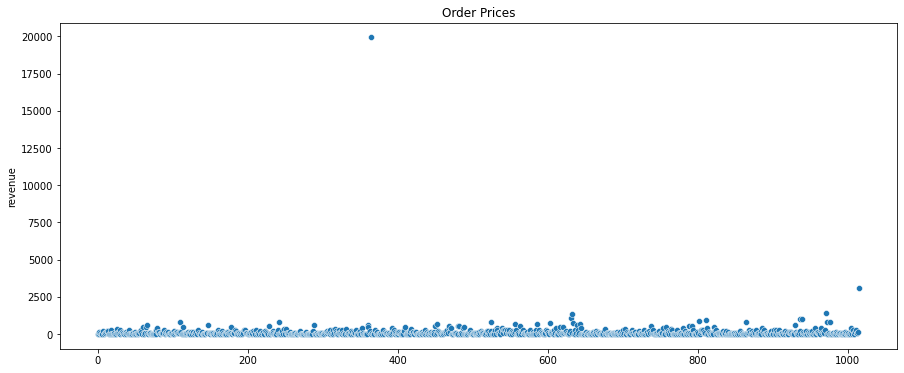

In [42]:
fig,graph= plt.subplots(figsize=(15,6))
graph =  sns.scatterplot(data=orders, x=range(0,len(orders)), y='revenue')
graph.set_title("Order Prices")

- Most orders seem to be of less than 900, with 2 that stand out of 1015 and 19,920k.
- This last order is definetly a strange case, would be worth to dig in deeper to find out the reason why and possibly to replicate

#### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [43]:
print(np.percentile(orders['revenue'], [95,99]))

[414.275 830.3  ]


- Not more than 5% of purchases had a revenue of more than 414
- Not more than 1% of purchases had a revenue of more than 830
- Every purchase above 414 can be considered an outlier
- In this case, there are a few orders that can be considered outliers, but 1 prominent one of almost 20K that really stands out. It is definetly worth investigating what this purchase was about.

#### Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

- H0: Based on the raw data, there is no difference in conversion rates between Group A and Group B
- H1: Based on the raw data, there is a difference in conversion rates between Group A and Group B

In [44]:
orders_by_users_a = orders[orders['group']=='A']
orders_by_users_a = orders_by_users_a.groupby('visitorid', as_index=False).agg({'transactionid': 'nunique'})
orders_by_users_a.columns = ['visitorid', 'orders']

orders_by_users_b = orders[orders['group']=='B']
orders_by_users_b = orders_by_users_b.groupby('visitorid', as_index=False).agg({'transactionid': 'nunique'})
orders_by_users_b.columns = ['visitorid', 'orders']

In [45]:
conversion.head()

,date,orders_a,orders_b,visits_a,visits_b,conversion_a,conversion_b
0,2019-08-01,23,17,719,713,0.031989,0.023843
1,2019-08-02,19,23,619,581,0.030695,0.039587
2,2019-08-03,24,14,507,509,0.047337,0.027505
3,2019-08-04,11,14,717,770,0.015342,0.018182
4,2019-08-05,22,21,756,707,0.029101,0.029703


In [46]:
# Creating variables with the number of orders per user, and 0's for visits that didn't become orders 

zero_orders_a = pd.Series(0, index=np.arange(conversion['visits_a'].sum() - len(orders_by_users_a['orders'])), name='orders')

sample_a = pd.concat([orders_by_users_a['orders'], zero_orders_a], axis=0)


In [47]:
zero_orders_b = pd.Series(0, index=np.arange(conversion['visits_b'].sum() - len(orders_by_users_b['orders'])), name='orders')

sample_b = pd.concat([orders_by_users_b['orders'], zero_orders_b], axis=0)

In [48]:
print((stats.mannwhitneyu(sample_a, sample_b)[1]))
print("{0:.3f}".format(sample_b.mean()/sample_a.mean()-1))

0.011018084110014696
0.160


- Based on the raw data, since the p-value is less than 0.05, we reject the hypothesis that there is no difference between groups A and B  
- **There is a statistical difference in conversion rates between groups**
- Group B has a relative gain (over Group A) of 16% in conversion

#### Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

- H0: Based on the raw data, there is no difference in average order size between Group A and Group B
- H1: Based on the raw data, there is a difference in average order size between Group A and Group B

In [49]:
print((stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


0.8622329690015668
0.278


- Based on the raw data, since the p-value is larger than 0.05, we can't reject the hypothesis that there is no difference in average order size between groups A and B
- **There seems to be no difference in average order size between groups**
- Relative gain of group B is 0.28%

#### Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

- H0: Based on the filtered data, there is no difference in conversion between Group A and Group B
- H1: Based on the filtered data, there is a difference in conversion between Group A and Group B

In [50]:
# As concluded previously, all users that placed more than 1 order will be considered outliers

users_with_many_orders = orders_by_users[orders_by_users['orders']>1]['visitorid']

# As concluded previously, all purchases above 414 can be considered an outlier 

users_with_expensive_orders = orders[orders['revenue']>414]['visitorid']

outliers = pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0).drop_duplicates()

In [51]:
sample_a_filtered = pd.concat([orders_by_users_a[np.logical_not(orders_by_users_a['visitorid'].isin(outliers))]['orders'], zero_orders_a], axis=0) 

sample_b_filtered = pd.concat([orders_by_users_b[np.logical_not(orders_by_users_b['visitorid'].isin(outliers))]['orders'], zero_orders_b], axis=0) 
    
print((stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1])) 
print('{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))



0.01593020716573973
0.174


- The p-value decreased slightly - it is still lower than an 0.05 alpha, we reject the null hypotheses  
- **There is a statistical difference in conversion between Group A and Group B**
- The relative difference in average order size between the groups increased as well, which means performance of group B is even betten than seen before

#### Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

- H0: Based on the filtered data, there is no difference in average order size between Group A and Group B
- H1: Based on the filtered data, there is a difference in average order size between Group A and Group B

In [52]:
print((stats.mannwhitneyu(
orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorid'].isin(outliers)))]['revenue'], 
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorid'].isin(outliers)))]['revenue'])[1]))

print('{0:.3f}'.format(orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorid'].isin(outliers)))]['revenue'].mean()/
                       orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorid'].isin(outliers)))]['revenue'].mean()-1))
                                                                                  
                                                                                 


0.7711877309994826
-0.033


- The p-value slightly increased, and we still can't reject the hypothesis that there is no difference in average order size between groups A and B
- **There seems to be no difference in average order size between groups A and B**
- The relative group loss of B over A decreased significantly: from 0.278 to -0.033


#### Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

- A clear problem seen in this project is the fact that part of the users went to both Groups A and B, which resulted in them being removed from the Orders database. Visits database was left untouched as UID's were missing in this database, therefore, the information in this study cannot be 100% trusted.
- Seems that the 1 order with revenue 19920.4 really affect the test's results, since removing this (and other outliers) caused the relative gain of Group B to become a relative loss
- There seems to be no difference in average order size between groups, but there is a statistical difference in conversion between Group A and Group B
- **Based on the above, I would stop the test, and consider Group B to be the leader**